In [2]:
from datetime import date
import covidcast
import matplotlib.pyplot as plt

data = covidcast.signal("usa-facts", "confirmed_7dav_incidence_num",
                        date(2020, 3, 15), date(2020, 12, 5),
                        "state")

death = covidcast.signal("usa-facts", 'deaths_7dav_incidence_num',
                        date(2020, 3, 15), date(2020, 12, 5),
                        "state")

In [3]:
#plt.rcParams['figure.figsize'] = [5.5, 4]
SMALL_SIZE = 10.5
MEDIUM_SIZE = 11
MEDIUM_Plus= 11.5
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_Plus)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = [13, 2.9]


Index(['time_value', 'value'], dtype='object')
               value
time_value          
2020-03-15  0.013122
2020-03-16  0.017337
2020-03-17  0.016141
2020-03-18  0.015324
2020-03-19  0.014216
2020-03-20  0.012592
2020-03-21  0.012085
2020-03-22  0.012572
2020-03-23  0.012418
2020-03-24  0.014290


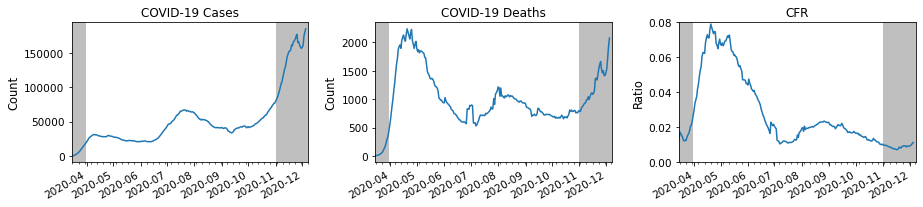

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
time = 'time_value'
fig, ax = plt.subplots(1,3)

data.groupby(time)['value'].sum().plot(ax=ax[0])
death.groupby(time)['value'].sum().plot(ax=ax[1])


crf_value =  death.groupby(time)['value'].sum().reset_index()['value'] / data.groupby(time)['value'].sum().reset_index()['value']
crf = data.groupby(time)['value'].sum().reset_index()
crf['value'] = crf_value
print(crf.columns)
crf = pd.DataFrame(crf)
#crf[time] = 
crf.set_index('time_value', inplace=True)#,# inplace=True)
print(crf[:10])
crf['value'].plot(ax=ax[2])



min_date = pd.Timestamp("2020-03-15")
max_date = pd.Timestamp("2020-12-8")


for i in range(3):
    ax[i].set_xlabel("")
    ax[i].set_xlim(min_date, max_date)
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Ratio')

ax[0].set_title("COVID-19 Cases")
ax[1].set_title("COVID-19 Deaths")
ax[2].set_title("CFR")
ax[2].set_ylim(0, 0.08)
plt.tight_layout()



import matplotlib.dates as dates

for i in range(3):
    plt.gcf().autofmt_xdate()

    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(dates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    ax[i].axvspan(pd.Timestamp('2020-11-01'), pd.Timestamp(max_date), color='grey', alpha=0.5, lw=0)
    ax[i].axvspan(pd.Timestamp(min_date), pd.Timestamp(min_date) + pd.Timedelta(days=16), color='grey', alpha=0.5, lw=0)
    
fig.savefig('img_country/{}'.format('national_cases.pdf'), bbox_inches='tight')
